In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
# suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
# suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [4]:
## for convenience, we performed the QC in four chunks, here we merge them 

In [5]:
# first SCE object includes merged QCed SCE object experiments 01-28 (remove 28)

In [6]:
sce1 = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180227/sce_merged_qc_01to28_filt.rds")

In [7]:
sce1 = sce1[, !(sce1$experiment == "expt_28")]

In [8]:
unique(sce1$experiment)

[1] "expt_01" "expt_03" "expt_06" "expt_09" "expt_10" "expt_12" "expt_18"
 [8] "expt_19" "expt_20" "expt_21" "expt_22" "expt_23" "expt_24" "expt_27"

In [9]:
dim(sce1)

[1] 11699  5926

In [10]:
###### second merged dataset (expts 30,31, + 36-39) ######

In [11]:
sce2 = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180227/sce_merged_qc_29to39_filt.rds")

In [12]:
sce2 = sce2[, !(sce2$experiment %in% c("expt_29","expt_32","expt_33","expt_34","expt_35"))]

In [13]:
unique(sce2$experiment)

[1] "expt_30" "expt_31" "expt_36" "expt_37" "expt_38" "expt_39"

In [14]:
dim(sce2)

[1] 11962  8144

In [15]:
###### third merged dataset (expts 40 - 45) ######

In [16]:
sce3 = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180227/sce_merged_qc_40to45_filt.rds")

In [17]:
unique(sce3$experiment)

[1] "expt_40" "expt_41" "expt_42" "expt_43" "expt_44" "expt_45"

In [18]:
dim(sce3)

[1] 11601 11357

In [19]:
###### 4th replicates two added expts 28,29,32,33,34,35 ######

In [20]:
sce4 = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180227/sce_merged_qc_rep2_filt.rds")

In [21]:
unique(sce4$experiment)

[1] "expt_28" "expt_29" "expt_32" "expt_33" "expt_34" "expt_35"

In [22]:
dim(sce4)

[1] 11904 12180

In [22]:
## in order to merge the objects, we need to use the same set of genes. 
## Those are defined as highly enough expressed in each of the sets, so could be slighly different in each chunk
## This should not bias towards genes that are highly expressed at late differentiation stages or early ones,
## since each chunk contains multiple differentiation experiments, and each experiment contains cells from all days

In [23]:
a = rownames(sce1)
b = rownames(sce2)
c = rownames(sce3)
d = rownames(sce4)
common_genes = intersect(intersect(intersect(a,b),c),d)
length(common_genes)

[1] 11231

In [24]:
sce1 = sce1[rownames(sce1) %in% common_genes,]
sce2 = sce2[rownames(sce2) %in% common_genes,]
sce3 = sce3[rownames(sce3) %in% common_genes,]
sce4 = sce4[rownames(sce4) %in% common_genes,]

In [25]:
e = names(colData(sce1))
f = names(colData(sce2))
g = names(colData(sce3))
h = names(colData(sce4))
common_columns = intersect(intersect(intersect(e,f),g),h)
length(common_columns)

[1] 113

In [26]:
# we want to also have the same sets of rowData, colData

In [26]:
colData(sce1) <- colData(sce1)[, names(colData(sce1)) %in% common_columns]
colData(sce2) <- colData(sce2)[, names(colData(sce2)) %in% common_columns]
colData(sce3) <- colData(sce3)[, names(colData(sce3)) %in% common_columns]
colData(sce4) <- colData(sce4)[, names(colData(sce4)) %in% common_columns]
colData(sce1) <- colData(sce1)[, order(names(colData(sce1)))]
colData(sce2) <- colData(sce2)[, order(names(colData(sce2)))]
colData(sce3) <- colData(sce3)[, order(names(colData(sce3)))]
colData(sce4) <- colData(sce4)[, order(names(colData(sce4)))]

In [27]:
rowData(sce1) <- rowData(sce1)[, 1:11]
rowData(sce2) <- rowData(sce2)[, 1:11]
rowData(sce3) <- rowData(sce3)[, 1:11]
rowData(sce4) <- rowData(sce4)[, 1:11]

In [28]:
# actual merging

In [29]:
sce = cbind(sce1, sce2, sce3, sce4)

In [30]:
sce

class: SingleCellExperiment 
dim: 11231 37607 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(11): exprs_collapsed_to ensembl_transcript_id ...
  feature_id is_feature_control
colnames(37607): 20416_1#10 20416_1#11 ... 24539_8#97 24539_8#98
colData names(113): adj_x adj_y ... x y
reducedDimNames(0):
spikeNames(1): ERCC

In [31]:
sce$donor %>% head

[1] "podx" "podx" "eipl" "pahc" "podx" "kuxp"

In [32]:
### add donor IDs

In [33]:
donor.df <- as.data.frame(cbind(sce$donor, colnames(sce)))
colnames(donor.df) <- c("donor","cell")
dim(donor.df)

[1] 37607     2

In [34]:
donor.meta = read.csv("/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_beforefilt_metadata_20180618.linemapping.tsv", sep = "\t")

In [35]:
colnames(donor.meta)[1] = "cell"
dim(donor.meta)

[1] 37607     3

In [36]:
df.donorinfo = inner_join(donor.df, donor.meta, by = "cell")

In [37]:
head(df.donorinfo)

donor,cell,donor_short_id,donor_long_id
podx,20416_1#10,podx_1,HPSI1113i-podx_1
podx,20416_1#11,podx_1,HPSI1113i-podx_1
eipl,20416_1#112,eipl_1,HPSI0114i-eipl_1
pahc,20416_1#117,pahc_4,HPSI1213i-pahc_4
podx,20416_1#118,podx_1,HPSI1113i-podx_1
kuxp,20416_1#121,kuxp_1,HPSI1013i-kuxp_1


In [38]:
sce$donor_short_id = df.donorinfo$donor_short_id
sce$donor_long_id = df.donorinfo$donor_long_id

In [39]:
sce

class: SingleCellExperiment 
dim: 11231 37607 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(11): exprs_collapsed_to ensembl_transcript_id ...
  feature_id is_feature_control
colnames(37607): 20416_1#10 20416_1#11 ... 24539_8#97 24539_8#98
colData names(115): adj_x adj_y ... donor_short_id donor_long_id
reducedDimNames(0):
spikeNames(1): ERCC

In [68]:
### PCA on the data, pre - filtering

In [69]:
pca = prcomp(t(logcounts(sce)))

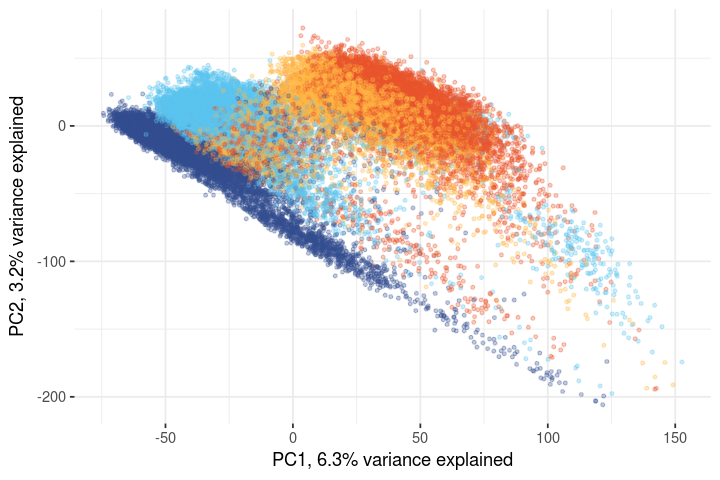

In [75]:
df = as.data.frame(cbind(pca$x[,1:2], sce$day))
perc_var <- round(summary(pca)$importance[2,]*100, 1)
options(repr.plot.width = 6, repr.plot.height = 4)
colnames(df)[3] <- "day"
ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day))) + 
        geom_point(alpha = 0.3, size = 0.8) + 
        scale_color_canva(palette = "Pool party") + theme_bw() +
        theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

In [ ]:
# saveRDS(sce, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_beforefilt.rds")

In [4]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_beforefilt.rds")

In [5]:
dim(sce)
length(unique(sce$donor_short_id))

[1] 11231 37607

[1] 137

In [41]:
## we know from looking at plating/sequencing information that plate 3301 was sequenced twice

In [6]:
# let's retrieve the respective sequencing lanes
sce_3301 = sce[,colData(sce)$plate_id == "3301"]
unique(gsub("#.*","",colData(sce_3301)$sample_id))

[1] "25216_2" "25216_4"

In [7]:
# and count how many (good quality) cells we have in each, to determine which one to keep
dim(sce_3301[,gsub("#.*","",colData(sce_3301)$sample_id) == "25216_2"])
dim(sce_3301[,gsub("#.*","",colData(sce_3301)$sample_id) == "25216_4"])

[1] 11231   254

[1] 11231   328

In [8]:
## similarly, plate 2519

sce_2519 = sce[,colData(sce)$plate_id == "2519"]
unique(gsub("#.*","",colData(sce_2519)$sample_id))

dim(sce_2519[,gsub("#.*","",colData(sce_2519)$sample_id) == "23794_5"])
dim(sce_2519[,gsub("#.*","",colData(sce_2519)$sample_id) == "23794_6"])

In [11]:
## from the qc step, we saw some experiments/plates did not look very good, let's have a look
sce19 = sce[,sce$experiment == "expt_19"]
table(sce19$donor, sce19$day)

In [13]:
sce06 = sce[,sce$experiment == "expt_06"]
table(sce06$donor, sce06$day)

      
       day1 day2 day3
  bima   19    1    4
  lexy    9    3    3
  oapg    5    1    1
  pamv   12    7    5
  rozh    7    2    4

In [14]:
sce01 = sce[,sce$experiment == "expt_01"]
table(sce01$donor, sce01$day)

      
       day3
  eika    4
  eipl    2
  kuxp   21
  pahc    4
  podx   21
  xugn   21

In [15]:
sce20_0 = sce[,sce$experiment == "expt_20"& sce$day == "day0"]
table(sce20_0$donor, sce20_0$day)

      
       day0
  fasu   20
  iudw   10
  kajh    8
  tavh    2
  tout    8

In [16]:
sce3_3 = sce[,sce$experiment == "expt_03" & sce$day == "day3"]
table(sce3_3$donor, sce3_3$day)

      
       day3
  bubh    7
  eika    4
  ffdm   18
  jufd   10
  oaaz    8

In [17]:
sce28_3 = sce[,sce$experiment == "expt_28" & sce$day == "day3"]
table(sce28_3$donor, sce28_3$day)

      
       day3
  iiyk   15
  laey   24
  letw   68
  miaj   14
  poih   41
  rutc   46

In [18]:
sce32_23 = sce[,sce$experiment == "expt_32" & sce$day %in% c("day2","day3")]
table(sce32_23$donor, sce32_23$day)

      
       day2 day3
  guss   94   71
  lepk   13    2
  mita   51   37
  nocf   25   11
  oibg  155  140

In [19]:
# from experimnt 28 onwards, we have two replicate plates per day

In [20]:
sce_filt = sce[,!(colData(sce)$plate_id %in% c("3345",              # expt 42, day0 (there is only rep1)
                                              "2034",               # expt 30, day2, rep2 
                                              "3156", "3157",       # expt 37, day3, rep1 & rep2
                                              "1223",               # expt 20, day0 (before diff 28 there are no reps)
                                              "1655"))   &          # expt 27, day2 (before diff 28 there are no reps) 
                  !(sce$experiment %in% c("expt_01", "expt_03", "expt_06", "expt_19")) &
                  !(gsub("#.*","",colData(sce)$sample_id) %in% c("23794_6",  # plate 2519 was seq 2x (diff32,day2,rep1)
                                                                "25216_2")) # plate 3301 was seq 2x (diff39,day1,rep2)             
              ]

In [21]:
# experiment 27 plates were swapped between day1, day3
sce_filt[,colData(sce_filt)$plate_id == "1654"]$day = "day1"
sce_filt[,colData(sce_filt)$plate_id == "1652"]$day = "day3"

In [22]:
dim(sce_filt)

[1] 11231 36258

In [23]:
# also not clear why ffdm/fpdm was included as a donor for expt 27, removed
sce_filt = sce_filt[,!(sce_filt$experiment == "expt_27" & !(sce_filt$donor %in% c("letw","oilg","quls","rutc","sohd","vazt")))]

In [24]:
c(ncol(sce),
length(unique(sce$donor)),
length(unique(sce[,sce$day == "day0"]$donor)),
length(unique(sce[,sce$day == "day1"]$donor)),
length(unique(sce[,sce$day == "day2"]$donor)),
length(unique(sce[,sce$day == "day3"]$donor)))

[1] 37607   137   122   118   120   128

In [25]:
c(ncol(sce_filt),
length(unique(sce_filt$donor)),
length(unique(sce_filt[,sce_filt$day == "day0"]$donor)),
length(unique(sce_filt[,sce_filt$day == "day1"]$donor)),
length(unique(sce_filt[,sce_filt$day == "day2"]$donor)),
length(unique(sce_filt[,sce_filt$day == "day3"]$donor)))

[1] 36044   125   111   111   104   108

In [26]:
sce_filt

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(11): exprs_collapsed_to ensembl_transcript_id ...
  feature_id is_feature_control
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(115): adj_x adj_y ... donor_short_id donor_long_id
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [41]:
rm(list = ls())

In [27]:
saveRDS(sce_filt, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [28]:
sce_filt = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [38]:
library(scran)

Loading required package: BiocParallel


In [67]:
# sce_filt <- normalize(sce_filt)
fit <- trendVar(sce_filt, use.spikes = FALSE)
var_decomp <- decomposeVar(sce_filt, fit)

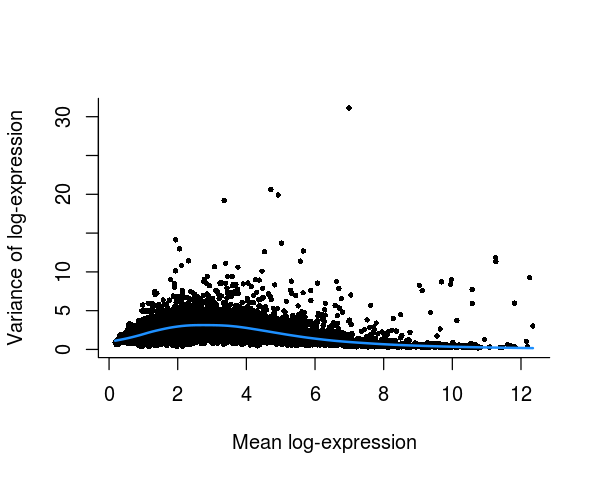

In [73]:
options(repr.plot.width = 5, repr.plot.height = 4)
plot(var_decomp$mean, var_decomp$total, pch = 16, cex = 0.6, 
     xlab = "Mean log-expression", ylab = "Variance of log-expression", bty = "l")
curve(fit$trend(x), col = "dodgerblue", lwd = 2, add = TRUE)

In [79]:
hvgs <- rownames(var_decomp[!(is.na(var_decomp$FDR)) & var_decomp$FDR < 0.005,])
length(hvgs)

[1] 4500

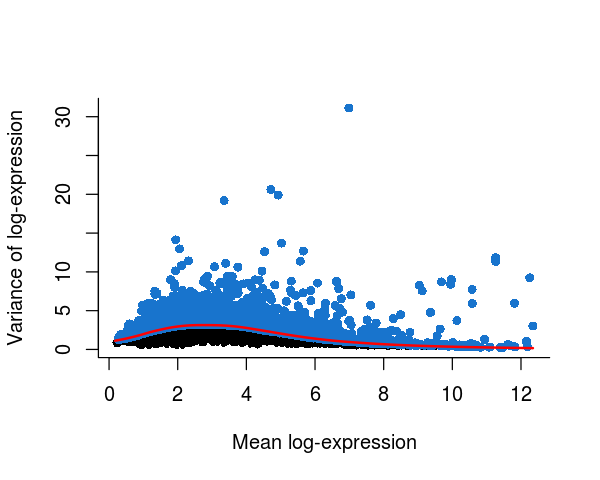

In [80]:
plot(var_decomp$mean, var_decomp$total, pch = 16, cex = 0.6, 
     xlab = "Mean log-expression", ylab = "Variance of log-expression", bty = "l")
points(var_decomp[hvgs,]$mean, var_decomp[hvgs,]$total, col="dodgerblue3", pch=16, alpha = 0.2)
curve(fit$trend(x), col = "red", lwd = 2, add = TRUE)

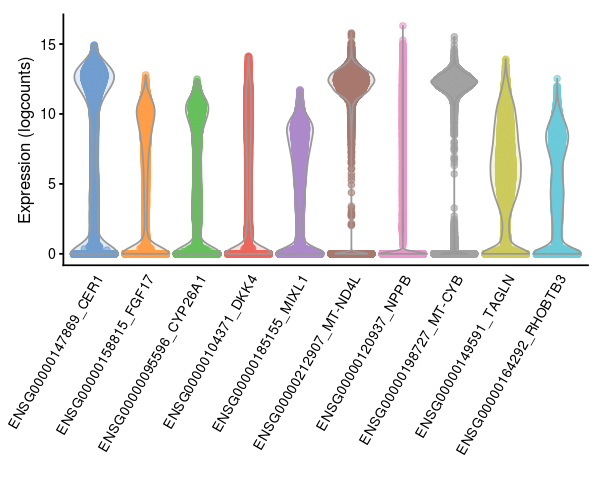

In [84]:
# library(scater)
plotExpression(sce_filt, features = rownames(var_decomp[order(var_decomp$bio, decreasing = TRUE),])[1:10])

In [85]:
pca_hvgs = prcomp(t(logcounts(sce[hvgs,])))

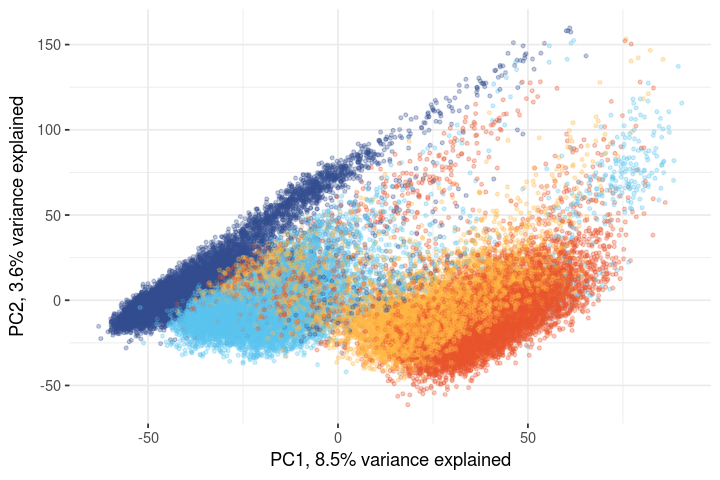

In [86]:
df = as.data.frame(cbind(pca_hvgs$x[,1:2], sce[hvgs,]$day))
perc_var <- round(summary(pca_hvgs)$importance[2,]*100, 1)
options(repr.plot.width = 6, repr.plot.height = 4)
colnames(df)[3] <- "day"
ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day))) + 
        geom_point(alpha = 0.3, size = 0.8) + 
        scale_color_canva(palette = "Pool party") + theme_bw() +
        theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

In [90]:
set.seed(125)
tsne <- Rtsne(t(logcounts(sce[hvgs,])), pca = TRUE)
head(tsne$Y)

15.57454,9.683225
17.62282,-3.103391
32.08706,20.736813
32.07769,20.763008
32.00589,20.653244
29.61954,21.975743


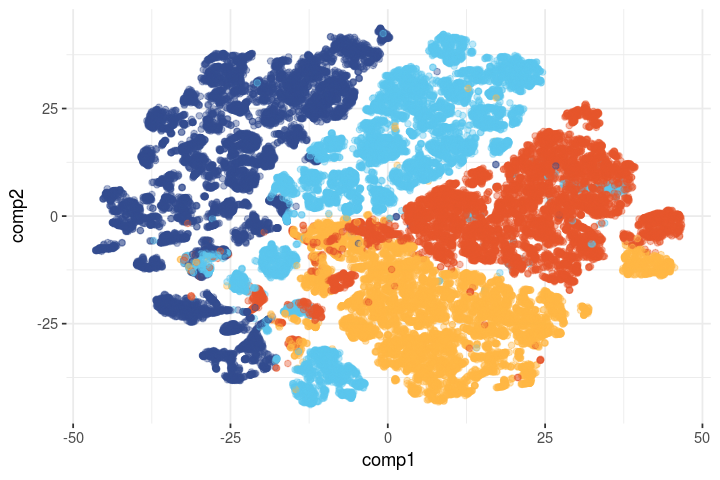

In [91]:
df <- data.frame(comp1 = tsne$Y[,1], comp2 = tsne$Y[,2], day = sce[hvgs,]$day)
ggplot(df, aes(x = comp1, y = comp2, colour = day)) + geom_point(alpha = 0.4) + 
        scale_color_canva(palette = "Pool party") +
        theme_bw() + theme(legend.position = "none", panel.border = element_blank())